<h1><center> 
    Enhancing Glioma Grading: Integrating Genomic and Clinical Features with Deep learning
</center></h1>

<h2>Course: CptS 534</h2>

##### Jingjing Nie: 11742013, School of Electrical Engineering and Computer Science
##### Wooyoung Kim: 11808206, Department of Mathematics and Statistics
##### Xinyue Wu: 11809269, Department of Sociology

### 1. Download dataset from UCI Machine learning Respository
###### (See detail in https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset)

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759) 
  
# data (as pandas dataframes) 
X = glioma_grading_clinical_and_mutation_features.data.features 
y = glioma_grading_clinical_and_mutation_features.data.targets 
  
# metadata 
print(glioma_grading_clinical_and_mutation_features.metadata) 
  
# variable information 
print(glioma_grading_clinical_and_mutation_features.variables) 


{'uci_id': 759, 'name': 'Glioma Grading Clinical and Mutation Features', 'repository_url': 'https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/759/data.csv', 'abstract': 'Gliomas are the most common primary tumors of the brain. They can be graded as LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) depending on the histological/imaging criteria. Clinical and molecular/mutation factors are also very crucial for the grading process. Molecular tests are expensive to help accurately diagnose glioma patients.    In this dataset, the most frequently mutated 20 genes and 3 clinical features are considered from TCGA-LGG and TCGA-GBM brain glioma projects.  The prediction task is to determine whether a patient is LGG or GBM with a given clinical and molecular/mutation features. The main objective is to find the optimal subset of mutation genes and clinical features for the glioma grading 

### 2. import Python liberaries

In [16]:
import pandas as pd
import numpy as np
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import Dataset
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay,roc_curve
from sklearn.metrics import accuracy_score

### 3. Split the dataset

In [3]:
# Convert them to numpy arrays and replace race info
X_numpy = X.to_numpy()
y_numpy = y.to_numpy()

my_dict = {'white': 0, 'black or african american': 1, 'asian': 2, 'american indian or alaska native':3}
for element in X_numpy:
    if element[2]=='white':
        element[2] = 0
    elif element[2]=='black or african american':
        element[2] = 1
    elif element[2]== 'asian':
        element[2] = 2
    elif element[2]== 'american indian or alaska native':
        element[2] = 3
X_numpy = X_numpy.astype(float)

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X_numpy, dtype=torch.float)
y_tensor = torch.tensor(y_numpy, dtype=torch.long)
y_tensor = y_tensor.squeeze()

# Create a TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)
# Hyper-parameters 
input_size = 23
hidden_size = 10
num_classes = 2
learning_rate = 0.001
num_epochs = 10
batch_size = 100
# Define the sizes for training and test datasets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Split the dataset
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


### 4. Define the MLP model

In [4]:

# Device configuration: check if there is a configured GPU available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out



### 5. Train and test the model with different Hyper-parameters 

hidden_size:  10
learning rate:  0.001
Epoch [1/10], Loss: 0.7642
Accuracy on test set: 41.67%
Accuracy of the network on the training inputs: 41.87779433681073 %
Epoch [2/10], Loss: 0.6870
Accuracy on test set: 42.86%
Accuracy of the network on the training inputs: 42.92101341281669 %
Epoch [3/10], Loss: 0.6866
Accuracy on test set: 61.31%
Accuracy of the network on the training inputs: 64.53055141579732 %
Epoch [4/10], Loss: 0.6791
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 60.05961251862891 %
Epoch [5/10], Loss: 0.6715
Accuracy on test set: 58.33%
Accuracy of the network on the training inputs: 58.56929955290611 %
Epoch [6/10], Loss: 0.6777
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 60.953800298062596 %
Epoch [7/10], Loss: 0.6757
Accuracy on test set: 66.67%
Accuracy of the network on the training inputs: 69.150521609538 %
Epoch [8/10], Loss: 0.6719
Accuracy on test set: 70.83%
Accuracy of the network on the trainin

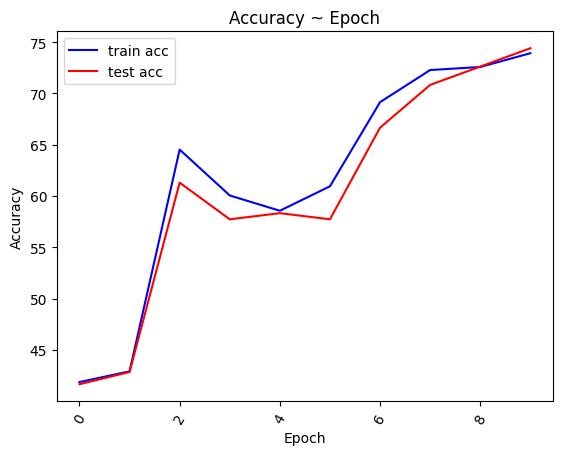

hidden_size:  10
learning rate:  0.01
Epoch [1/10], Loss: 0.7628
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [2/10], Loss: 0.7463
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [3/10], Loss: 0.6398
Accuracy on test set: 52.38%
Accuracy of the network on the training inputs: 53.502235469448586 %
Epoch [4/10], Loss: 0.6073
Accuracy on test set: 80.95%
Accuracy of the network on the training inputs: 81.2220566318927 %
Epoch [5/10], Loss: 0.6220
Accuracy on test set: 58.33%
Accuracy of the network on the training inputs: 60.804769001490314 %
Epoch [6/10], Loss: 0.5035
Accuracy on test set: 80.95%
Accuracy of the network on the training inputs: 82.56333830104322 %
Epoch [7/10], Loss: 0.5020
Accuracy on test set: 80.95%
Accuracy of the network on the training inputs: 82.56333830104322 %
Epoch [8/10], Loss: 0.4967
Accuracy on test set: 75.60%
Accuracy of the network on the traini

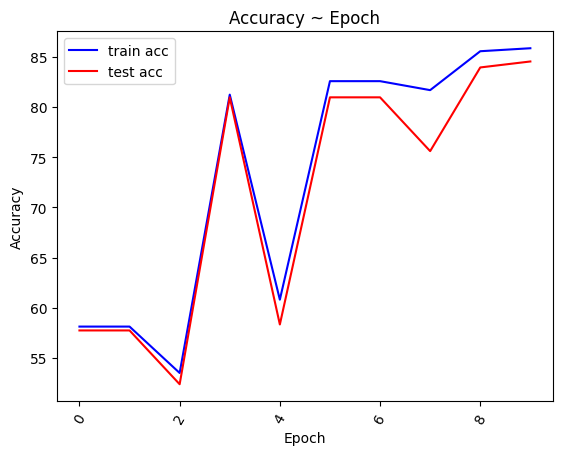

hidden_size:  10
learning rate:  0.1
Epoch [1/10], Loss: 0.6571
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [2/10], Loss: 0.5763
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [3/10], Loss: 0.4926
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [4/10], Loss: 0.4807
Accuracy on test set: 77.38%
Accuracy of the network on the training inputs: 81.2220566318927 %
Epoch [5/10], Loss: 0.4325
Accuracy on test set: 80.36%
Accuracy of the network on the training inputs: 86.58718330849479 %
Epoch [6/10], Loss: 0.4269
Accuracy on test set: 80.36%
Accuracy of the network on the training inputs: 86.4381520119225 %
Epoch [7/10], Loss: 0.2061
Accuracy on test set: 84.52%
Accuracy of the network on the training inputs: 87.9284649776453 %
Epoch [8/10], Loss: 0.4378
Accuracy on test set: 85.71%
Accuracy of the network on the training in

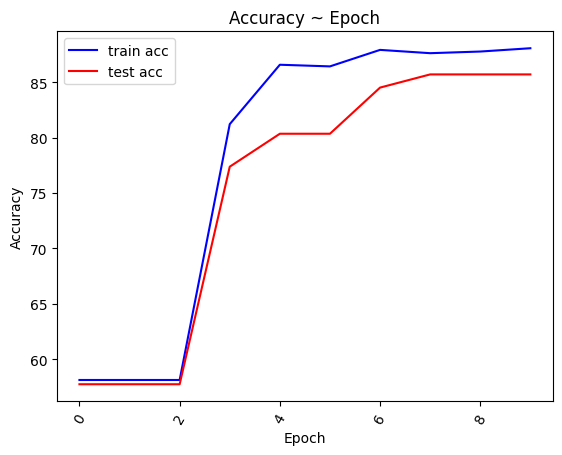

hidden_size:  20
learning rate:  0.001
Epoch [1/10], Loss: 0.9459
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [2/10], Loss: 0.7127
Accuracy on test set: 58.93%
Accuracy of the network on the training inputs: 57.97317436661699 %
Epoch [3/10], Loss: 0.6568
Accuracy on test set: 44.05%
Accuracy of the network on the training inputs: 45.603576751117735 %
Epoch [4/10], Loss: 0.6410
Accuracy on test set: 42.86%
Accuracy of the network on the training inputs: 44.26229508196721 %
Epoch [5/10], Loss: 0.6354
Accuracy on test set: 68.45%
Accuracy of the network on the training inputs: 70.49180327868852 %
Epoch [6/10], Loss: 0.6283
Accuracy on test set: 71.43%
Accuracy of the network on the training inputs: 70.93889716840536 %
Epoch [7/10], Loss: 0.6087
Accuracy on test set: 63.69%
Accuracy of the network on the training inputs: 64.82861400894188 %
Epoch [8/10], Loss: 0.5985
Accuracy on test set: 80.95%
Accuracy of the network on the train

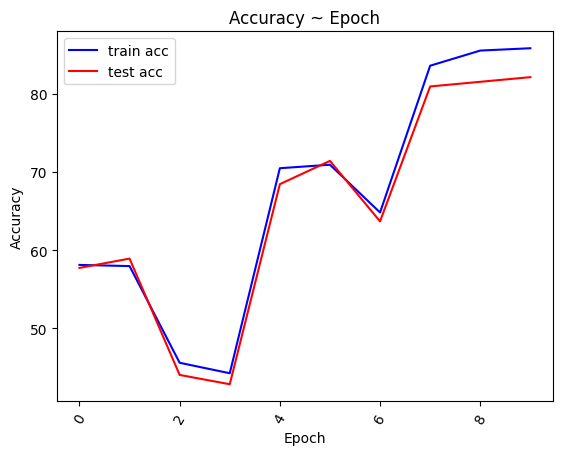

hidden_size:  20
learning rate:  0.01
Epoch [1/10], Loss: 0.7456
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [2/10], Loss: 0.6749
Accuracy on test set: 54.17%
Accuracy of the network on the training inputs: 59.01639344262295 %
Epoch [3/10], Loss: 0.5927
Accuracy on test set: 69.05%
Accuracy of the network on the training inputs: 73.77049180327869 %
Epoch [4/10], Loss: 0.5891
Accuracy on test set: 82.74%
Accuracy of the network on the training inputs: 85.99105812220566 %
Epoch [5/10], Loss: 0.4600
Accuracy on test set: 82.74%
Accuracy of the network on the training inputs: 85.99105812220566 %
Epoch [6/10], Loss: 0.4265
Accuracy on test set: 82.74%
Accuracy of the network on the training inputs: 86.4381520119225 %
Epoch [7/10], Loss: 0.4312
Accuracy on test set: 84.52%
Accuracy of the network on the training inputs: 86.4381520119225 %
Epoch [8/10], Loss: 0.3934
Accuracy on test set: 84.52%
Accuracy of the network on the training 

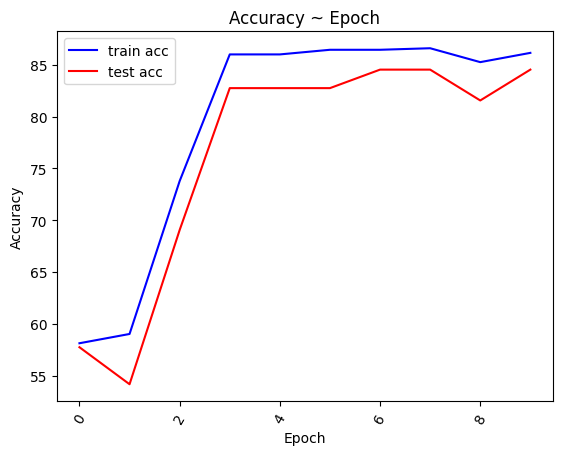

hidden_size:  20
learning rate:  0.1
Epoch [1/10], Loss: 0.6738
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 65.424739195231 %
Epoch [2/10], Loss: 0.6813
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [3/10], Loss: 0.6928
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [4/10], Loss: 0.7007
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [5/10], Loss: 0.6886
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [6/10], Loss: 0.7035
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [7/10], Loss: 0.6861
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [8/10], Loss: 0.7040
Accuracy on test set: 57.74%
Accuracy of the network on the training i

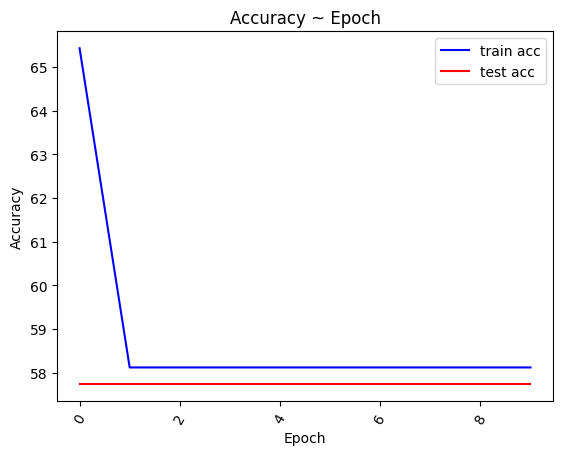

hidden_size:  30
learning rate:  0.001
Epoch [1/10], Loss: 1.8357
Accuracy on test set: 42.26%
Accuracy of the network on the training inputs: 41.87779433681073 %
Epoch [2/10], Loss: 0.8399
Accuracy on test set: 42.26%
Accuracy of the network on the training inputs: 41.87779433681073 %
Epoch [3/10], Loss: 0.7066
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [4/10], Loss: 0.7976
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [5/10], Loss: 0.7467
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [6/10], Loss: 0.6675
Accuracy on test set: 60.12%
Accuracy of the network on the training inputs: 59.76154992548435 %
Epoch [7/10], Loss: 0.6454
Accuracy on test set: 53.57%
Accuracy of the network on the training inputs: 55.886736214605065 %
Epoch [8/10], Loss: 0.6511
Accuracy on test set: 80.95%
Accuracy of the network on the train

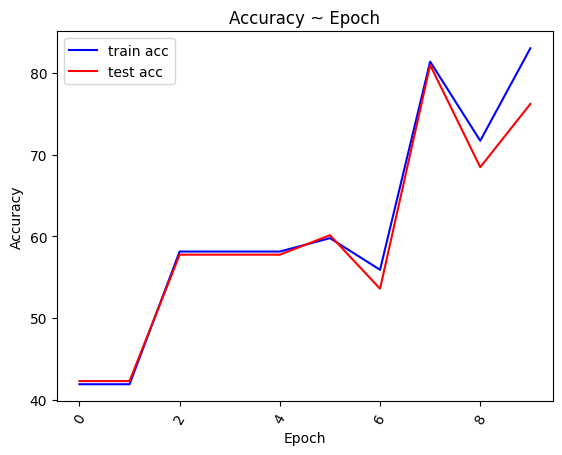

hidden_size:  30
learning rate:  0.01
Epoch [1/10], Loss: 0.6631
Accuracy on test set: 69.05%
Accuracy of the network on the training inputs: 69.59761549925484 %
Epoch [2/10], Loss: 0.6052
Accuracy on test set: 79.17%
Accuracy of the network on the training inputs: 81.52011922503726 %
Epoch [3/10], Loss: 0.5263
Accuracy on test set: 82.74%
Accuracy of the network on the training inputs: 85.99105812220566 %
Epoch [4/10], Loss: 0.4876
Accuracy on test set: 82.14%
Accuracy of the network on the training inputs: 85.69299552906111 %
Epoch [5/10], Loss: 0.4057
Accuracy on test set: 83.33%
Accuracy of the network on the training inputs: 83.15946348733235 %
Epoch [6/10], Loss: 0.3672
Accuracy on test set: 82.74%
Accuracy of the network on the training inputs: 86.58718330849479 %
Epoch [7/10], Loss: 0.3236
Accuracy on test set: 80.95%
Accuracy of the network on the training inputs: 84.79880774962743 %
Epoch [8/10], Loss: 0.4800
Accuracy on test set: 84.52%
Accuracy of the network on the trainin

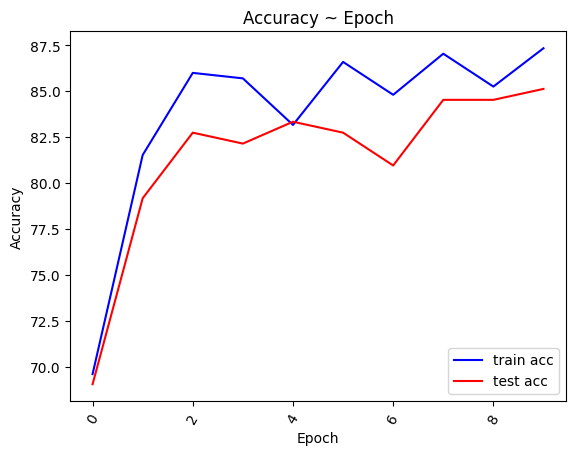

hidden_size:  30
learning rate:  0.1
Epoch [1/10], Loss: 0.7750
Accuracy on test set: 48.81%
Accuracy of the network on the training inputs: 55.886736214605065 %
Epoch [2/10], Loss: 0.6482
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [3/10], Loss: 0.6431
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [4/10], Loss: 0.6860
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [5/10], Loss: 0.6293
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [6/10], Loss: 0.6765
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [7/10], Loss: 0.6814
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [8/10], Loss: 0.7054
Accuracy on test set: 57.74%
Accuracy of the network on the trainin

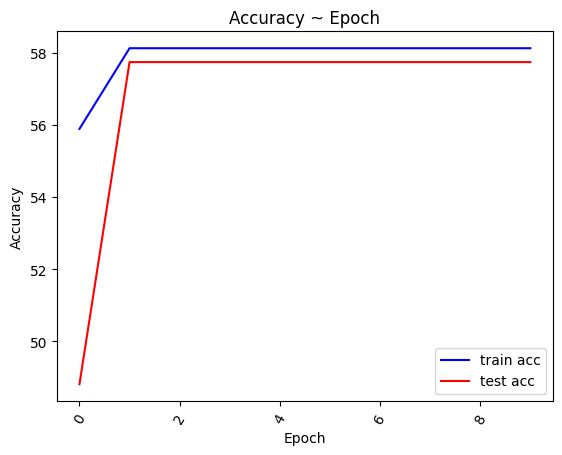

hidden_size:  50
learning rate:  0.001
Epoch [1/10], Loss: 0.7293
Accuracy on test set: 42.26%
Accuracy of the network on the training inputs: 41.87779433681073 %
Epoch [2/10], Loss: 0.8509
Accuracy on test set: 42.26%
Accuracy of the network on the training inputs: 41.87779433681073 %
Epoch [3/10], Loss: 0.6859
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [4/10], Loss: 0.7021
Accuracy on test set: 55.36%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [5/10], Loss: 0.6895
Accuracy on test set: 43.45%
Accuracy of the network on the training inputs: 45.603576751117735 %
Epoch [6/10], Loss: 0.6574
Accuracy on test set: 73.21%
Accuracy of the network on the training inputs: 78.2414307004471 %
Epoch [7/10], Loss: 0.6339
Accuracy on test set: 64.29%
Accuracy of the network on the training inputs: 68.10730253353204 %
Epoch [8/10], Loss: 0.6414
Accuracy on test set: 77.98%
Accuracy of the network on the traini

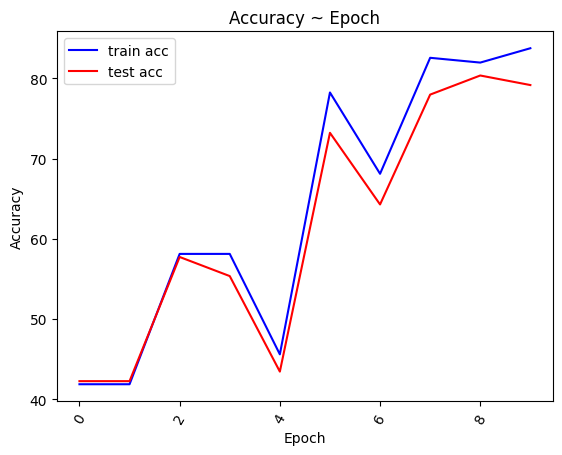

hidden_size:  50
learning rate:  0.01
Epoch [1/10], Loss: 0.9759
Accuracy on test set: 75.00%
Accuracy of the network on the training inputs: 78.68852459016394 %
Epoch [2/10], Loss: 0.6845
Accuracy on test set: 42.26%
Accuracy of the network on the training inputs: 43.070044709388974 %
Epoch [3/10], Loss: 0.6616
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.27123695976155 %
Epoch [4/10], Loss: 0.6079
Accuracy on test set: 79.76%
Accuracy of the network on the training inputs: 80.02980625931446 %
Epoch [5/10], Loss: 0.4876
Accuracy on test set: 85.71%
Accuracy of the network on the training inputs: 86.88524590163935 %
Epoch [6/10], Loss: 0.3374
Accuracy on test set: 81.55%
Accuracy of the network on the training inputs: 85.24590163934427 %
Epoch [7/10], Loss: 0.3797
Accuracy on test set: 84.52%
Accuracy of the network on the training inputs: 85.39493293591654 %
Epoch [8/10], Loss: 0.3527
Accuracy on test set: 85.71%
Accuracy of the network on the traini

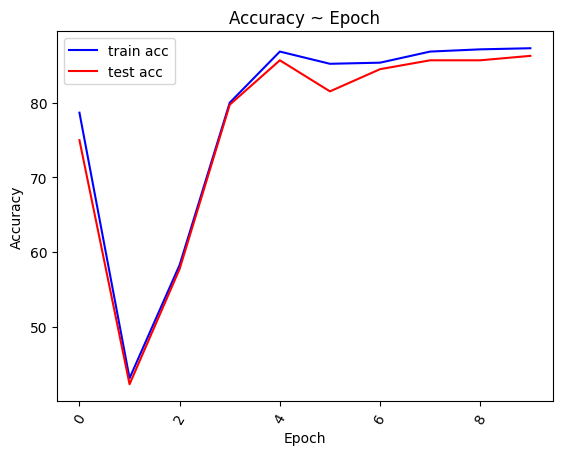

hidden_size:  50
learning rate:  0.1
Epoch [1/10], Loss: 0.7052
Accuracy on test set: 42.26%
Accuracy of the network on the training inputs: 41.87779433681073 %
Epoch [2/10], Loss: 0.7010
Accuracy on test set: 42.26%
Accuracy of the network on the training inputs: 41.87779433681073 %
Epoch [3/10], Loss: 0.6595
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [4/10], Loss: 0.6306
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [5/10], Loss: 0.6911
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [6/10], Loss: 0.6763
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [7/10], Loss: 0.7093
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [8/10], Loss: 0.6720
Accuracy on test set: 57.74%
Accuracy of the network on the training

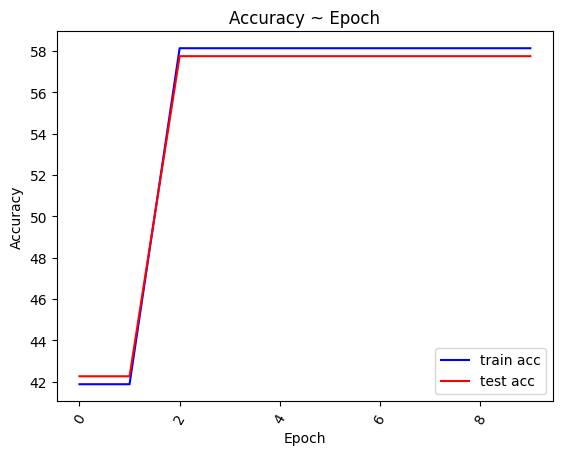

hidden_size:  100
learning rate:  0.001
Epoch [1/10], Loss: 0.6946
Accuracy on test set: 53.57%
Accuracy of the network on the training inputs: 55.439642324888226 %
Epoch [2/10], Loss: 0.8551
Accuracy on test set: 42.26%
Accuracy of the network on the training inputs: 41.87779433681073 %
Epoch [3/10], Loss: 0.6782
Accuracy on test set: 59.52%
Accuracy of the network on the training inputs: 58.71833084947839 %
Epoch [4/10], Loss: 0.7199
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [5/10], Loss: 0.6618
Accuracy on test set: 47.62%
Accuracy of the network on the training inputs: 56.78092399403875 %
Epoch [6/10], Loss: 0.6414
Accuracy on test set: 69.05%
Accuracy of the network on the training inputs: 74.06855439642325 %
Epoch [7/10], Loss: 0.6477
Accuracy on test set: 62.50%
Accuracy of the network on the training inputs: 62.742175856929954 %
Epoch [8/10], Loss: 0.5895
Accuracy on test set: 82.14%
Accuracy of the network on the tra

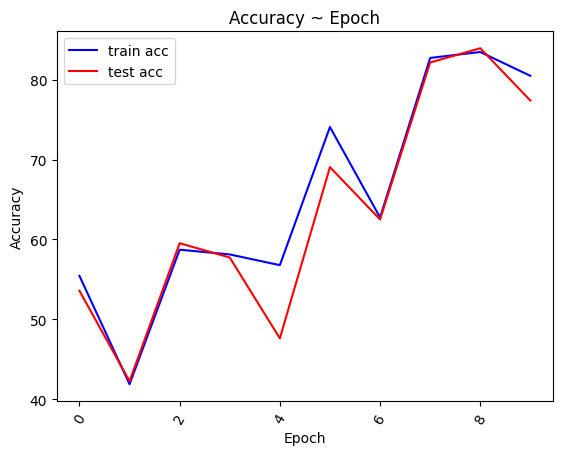

hidden_size:  100
learning rate:  0.01
Epoch [1/10], Loss: 0.5884
Accuracy on test set: 57.74%
Accuracy of the network on the training inputs: 58.12220566318927 %
Epoch [2/10], Loss: 0.7121
Accuracy on test set: 41.67%
Accuracy of the network on the training inputs: 45.603576751117735 %
Epoch [3/10], Loss: 0.5358
Accuracy on test set: 77.98%
Accuracy of the network on the training inputs: 79.28464977645305 %
Epoch [4/10], Loss: 0.4792
Accuracy on test set: 67.86%
Accuracy of the network on the training inputs: 69.74664679582712 %
Epoch [5/10], Loss: 0.4624
Accuracy on test set: 83.93%
Accuracy of the network on the training inputs: 86.58718330849479 %
Epoch [6/10], Loss: 0.4459
Accuracy on test set: 84.52%
Accuracy of the network on the training inputs: 87.03427719821163 %
Epoch [7/10], Loss: 0.4192
Accuracy on test set: 85.12%
Accuracy of the network on the training inputs: 87.03427719821163 %
Epoch [8/10], Loss: 0.4035
Accuracy on test set: 75.60%
Accuracy of the network on the train

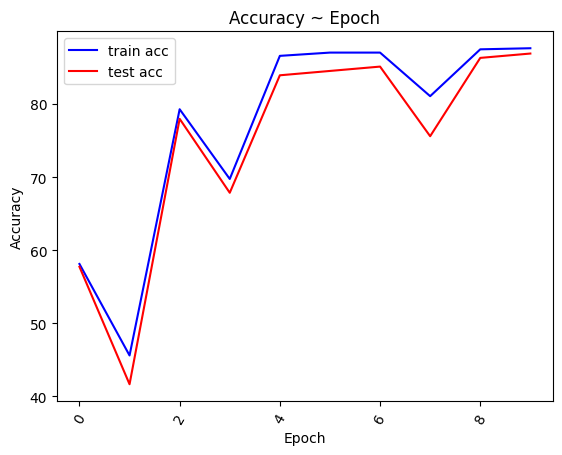

hidden_size:  100
learning rate:  0.1
Epoch [1/10], Loss: 2.5967
Accuracy on test set: 83.33%
Accuracy of the network on the training inputs: 85.84202682563338 %
Epoch [2/10], Loss: 0.6489
Accuracy on test set: 82.74%
Accuracy of the network on the training inputs: 84.05365126676602 %
Epoch [3/10], Loss: 0.5776
Accuracy on test set: 80.95%
Accuracy of the network on the training inputs: 83.30849478390462 %
Epoch [4/10], Loss: 0.3313
Accuracy on test set: 84.52%
Accuracy of the network on the training inputs: 86.58718330849479 %
Epoch [5/10], Loss: 0.4186
Accuracy on test set: 84.52%
Accuracy of the network on the training inputs: 85.84202682563338 %
Epoch [6/10], Loss: 0.5270
Accuracy on test set: 85.12%
Accuracy of the network on the training inputs: 87.03427719821163 %
Epoch [7/10], Loss: 0.4025
Accuracy on test set: 85.12%
Accuracy of the network on the training inputs: 87.33233979135619 %
Epoch [8/10], Loss: 0.3386
Accuracy on test set: 85.71%
Accuracy of the network on the trainin

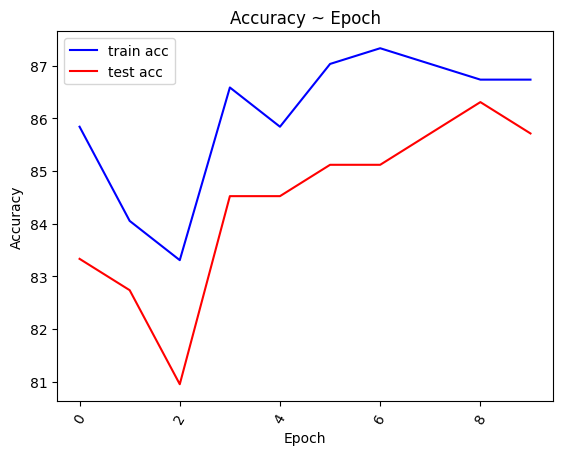

In [15]:

for hidden_size in [10,20,30,50,100]:
    for learning_rate in [0.001,0.01,0.1]:
        print("hidden_size: ", hidden_size)
        print("learning rate: ", learning_rate)
        # Define a model using class NeuralNet()
        model = NeuralNet(input_size, hidden_size, num_classes).to(device)
        
        # Define loss function and optimization algorithm (optimizer)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
        # Train the model
        total_step = len(train_loader)
        test_acc_list, train_acc_list = [], []
        for epoch in range(num_epochs):
            model.train()  # Set the model to training mode
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()  # Zero the parameter gradients
                outputs = model(inputs)  # Forward pass
                loss = criterion(outputs, labels)  # Compute the loss
                loss.backward()  # Backward pass
                optimizer.step()  # Optimize
                
        
            # Print average loss at the end of each epoch
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        
            # Evaluation on Test Set
            model.eval()  # Set the model to evaluation mode
            correct = 0
            total = 0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    _, predicted = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
            
                print(f"Accuracy on test set: {(100 * correct / total):.2f}%")
                test_acc_list.append(100 * correct / total)
            with torch.no_grad():
                    correct = 0
                    total = 0
                    for inputs, labels in train_loader:
                        inputs = inputs.to(device)
                        labels = labels.to(device)
                        outputs = model(inputs)
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
            
                    print('Accuracy of the network on the training inputs: {} %'.format(100 * correct / total))
                    train_acc_list.append(100 * correct / total)
        plt.plot(train_acc_list, '-b', label='train acc')
        plt.plot(test_acc_list, '-r', label='test acc')
        plt.legend()
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.xticks(rotation=60)
        plt.title('Accuracy ~ Epoch')
        # plt.savefig('assets/accr_{}.png'.format(cfg_idx))
        plt.show()
                

### 6. Split the data with sklearn

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=23, stratify=y_numpy)

### 7. Train and test the Logistic regression and SVM model

/home/yougu/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yougu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Logistic Regression
ACC: 0.8690476190476191


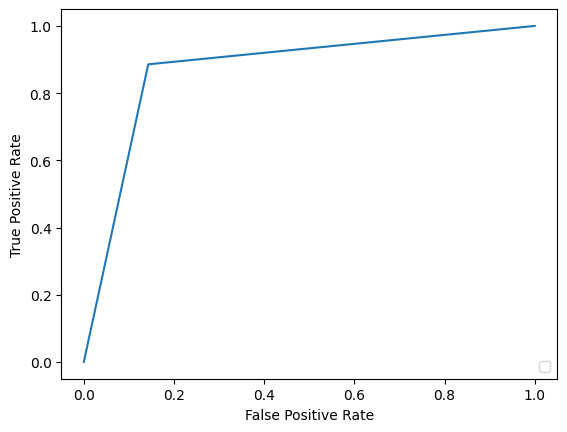

In [18]:
reg_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Logistic Regression")
print(f"ACC: {acc}")
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=reg_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

/home/yougu/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Support Vector Machines
ACC: 0.7440476190476191


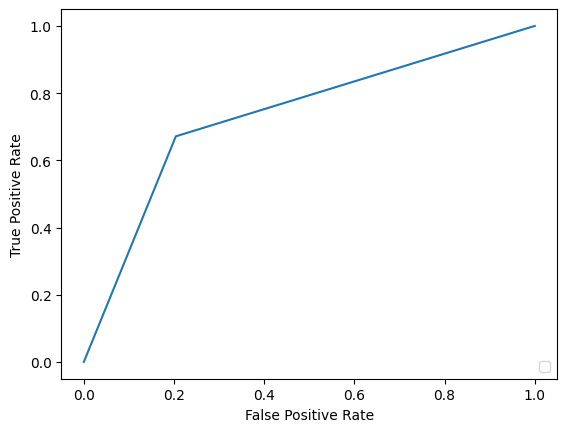

In [19]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ACC = accuracy_score(y_test,y_pred)
print("Support Vector Machines")
print(f"ACC: {ACC}")
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()